Takehome  Assignment Expectations/Steps -

Apply Data Cleaning to the Datasets and then apply Kmeans algorithm for find pattern and the best value of.the K for the following features.


### Statement of dataset

"customerid"- unique variable
"Gender"- Male and female(Target variable)
"Age"- Age of the employees
"Annual" Income (k$)- Annual Incoe of the employees
"Spending Score (1-100)"- Score of the employees

Aim to predict the variation between male and female employees related to their Annual income, score and Age.

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
df=pd.read_csv("Data01.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=df.set_index("CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


information about the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


datatypes of the dataset

In [6]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Shapes of the datset

In [7]:
df.shape

(200, 4)

In [8]:
df["Gender"]=pd.get_dummies(df["Gender"])

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


missing value treatment

In [10]:
df.isnull().sum()/len(df)*100

Gender                   0.000000
Age                      0.000000
Annual Income (k$)       0.000000
Spending Score (1-100)   0.000000
dtype: float64

There are no misisng value present in the dataset

Outliers Treatments of the dataset

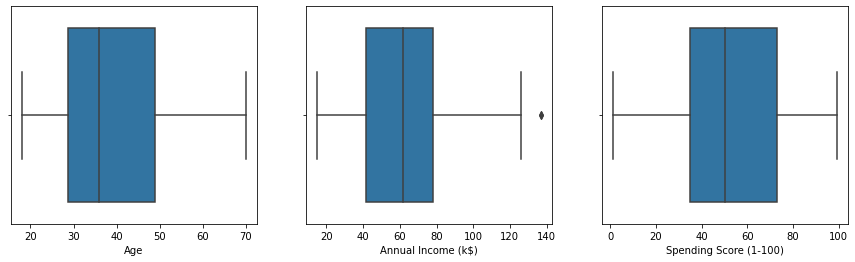

In [11]:
df_num = df.drop(['Gender'], axis = 1)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)
plt.show()

there are no outliers present in the dataset

In [12]:
df.skew()

Gender                   -0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

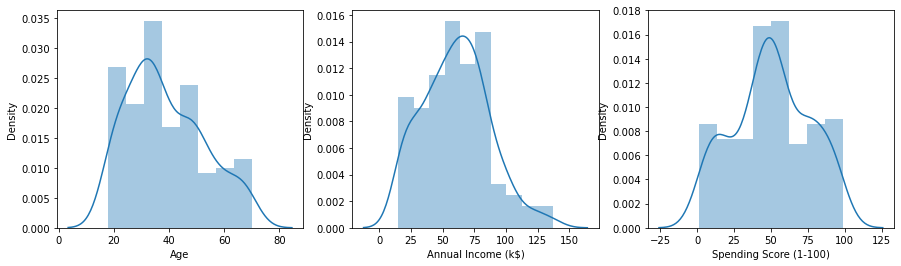

In [13]:
df_num = df.drop(['Gender'], axis = 1)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    sns.distplot(df[variable], ax = subplot)
plt.show()

In [14]:
Q1=df.quantile(0.25)
Q3=df.quantile(.70)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

(196, 4)

Scale the Data

In [15]:
X_norm = StandardScaler()
num_norm = X_norm.fit_transform(df)
X = pd.DataFrame(num_norm, columns = df.columns)
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.142752,-1.420066,-1.808460,-0.435233
1,-1.142752,-1.277587,-1.808460,1.198529
2,0.875080,-1.348826,-1.767464,-1.718903
3,0.875080,-1.135108,-1.767464,1.042932
4,0.875080,-0.565191,-1.726467,-0.396334


 K-Means Clustering

In [16]:
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

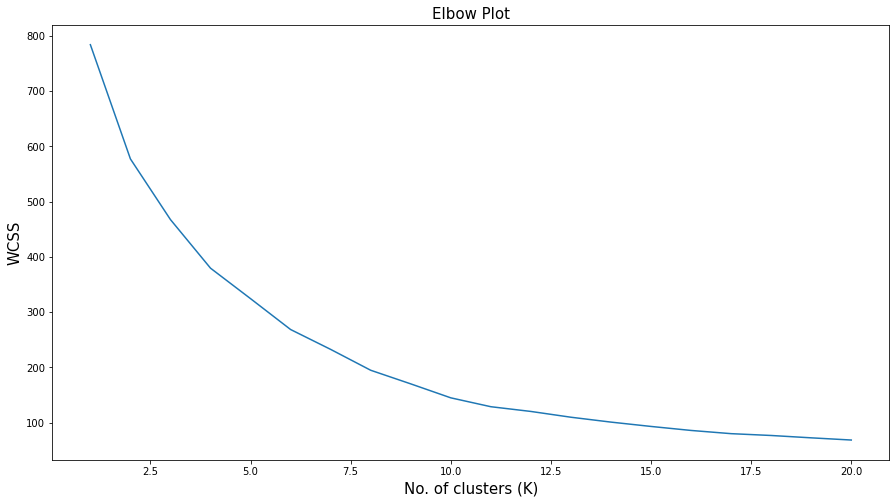

In [17]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

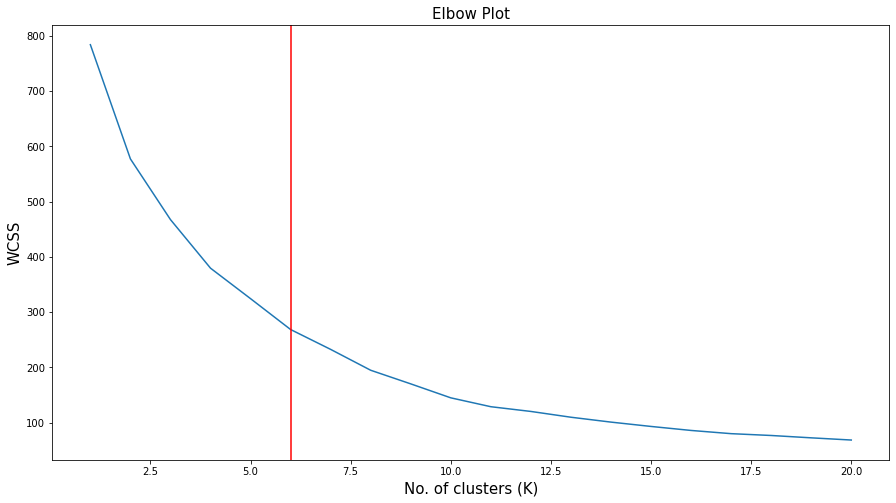

In [18]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.axvline(x = 6, color = 'red')
plt.show()

Interpretation: We can see that the for K = 6, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 6, the WCSS is decreasing slowly.

Now, let us use the silhouette score method to identify the optimal value of K.

Optimal Value of K Using Silhouette Score

In [19]:
n_clusters = [2, 3, 4, 5, 6,7]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.24985661071630547)
For 3 clusters the silhouette score is 0.25677666296189183)
For 4 clusters the silhouette score is 0.29912191892597)
For 5 clusters the silhouette score is 0.30698141739257984)
For 6 clusters the silhouette score is 0.33300566897799366)
For 7 clusters the silhouette score is 0.354567573401549)


In [22]:
# cluster 7 is best value for the . 

Visualize the silhouette scores

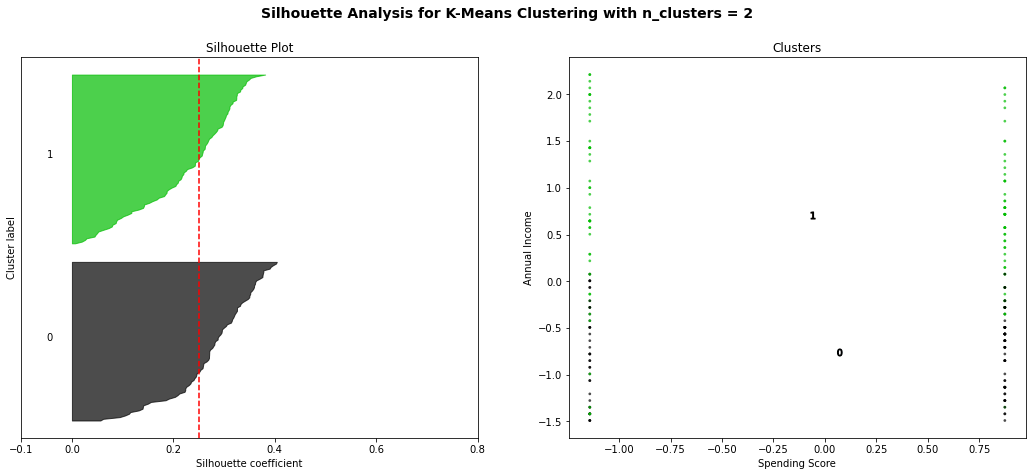

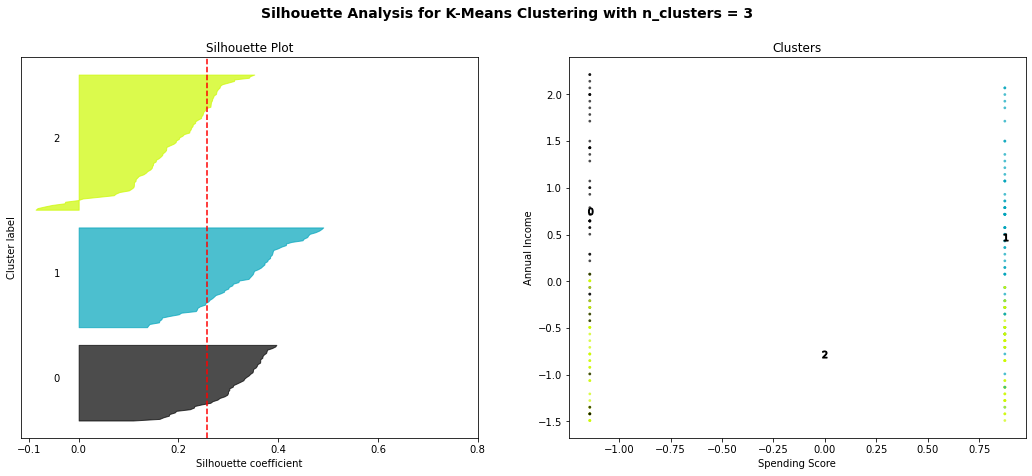

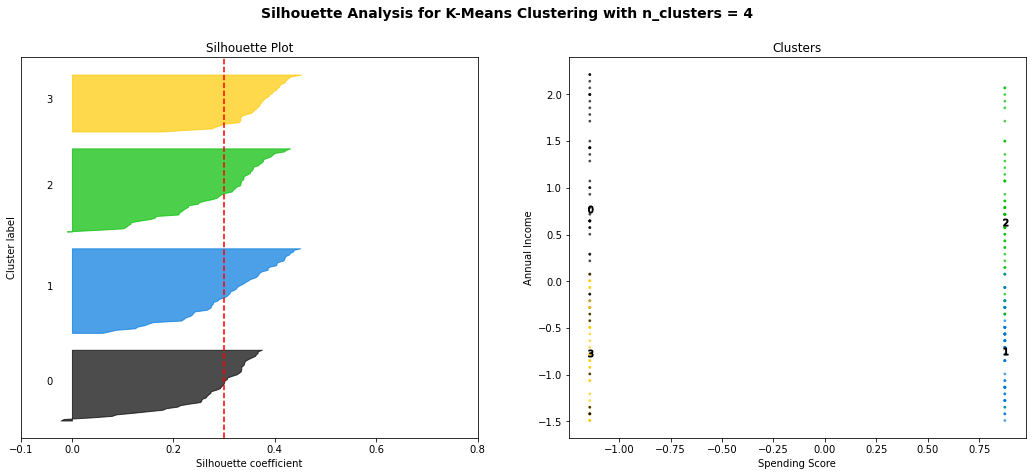

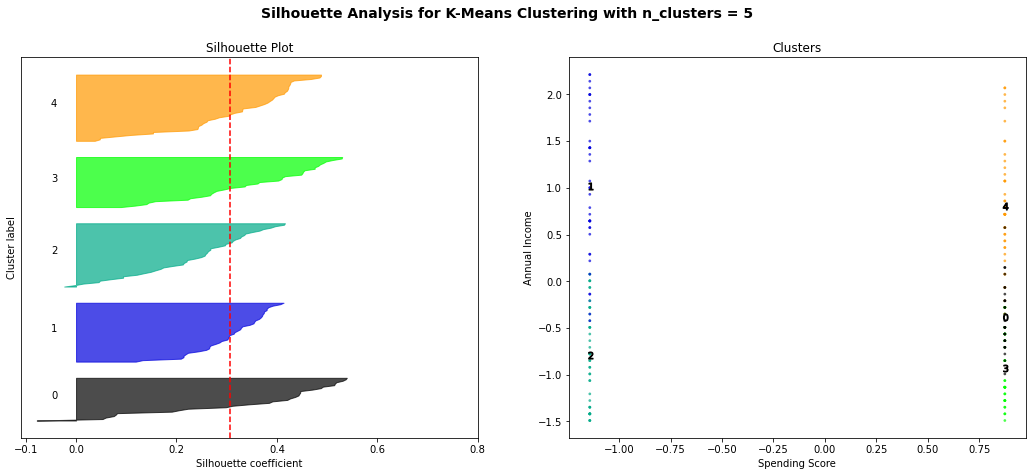

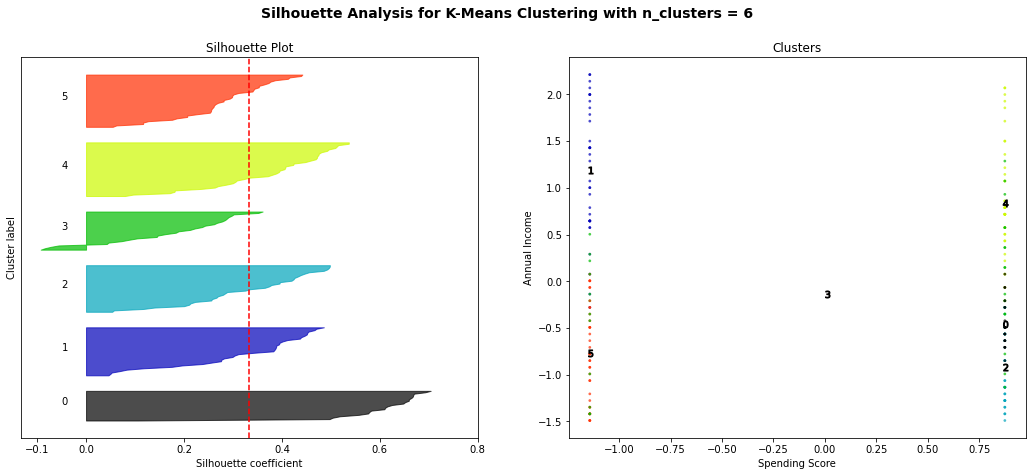

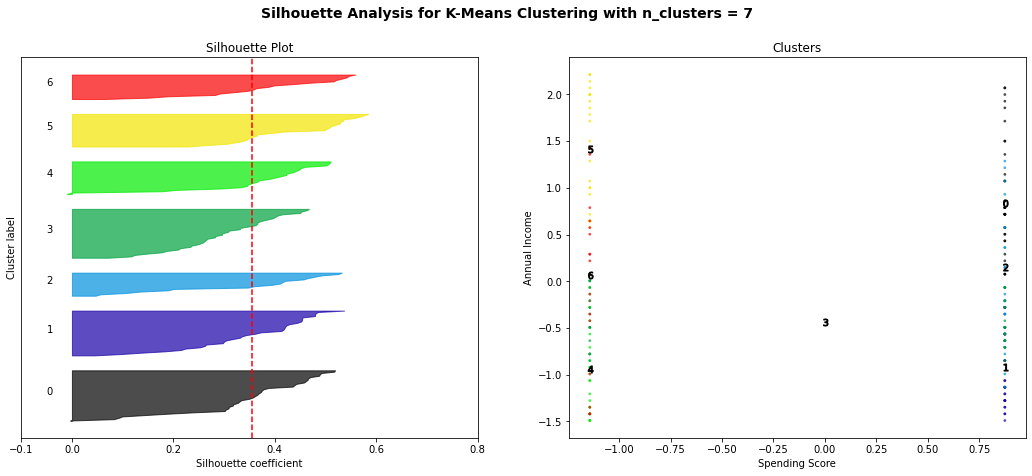

In [20]:
n_clusters = [2, 3, 4, 5, 6,7]
X = np.array(X)
for K in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    model = KMeans(n_clusters = K, random_state = 10)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = model.cluster_centers_
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')
plt.show()

Let us build the 5 clusters using K-menas clustering.

In [24]:
new_clusters = KMeans(n_clusters = 5, random_state = 10)
new_clusters.fit(X)
df['Cluster'] = new_clusters.labels_

In [25]:
# head() to display top five rows
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,0,19,15,39,2
2,0,21,15,81,2
3,1,20,16,6,3
4,1,23,16,77,3
5,1,31,17,40,3


#### Check the size of each cluster

In [26]:
df.Cluster.value_counts()

4    46
2    44
1    41
3    35
0    30
Name: Cluster, dtype: int64

**Plot a barplot to visualize the cluster sizes**

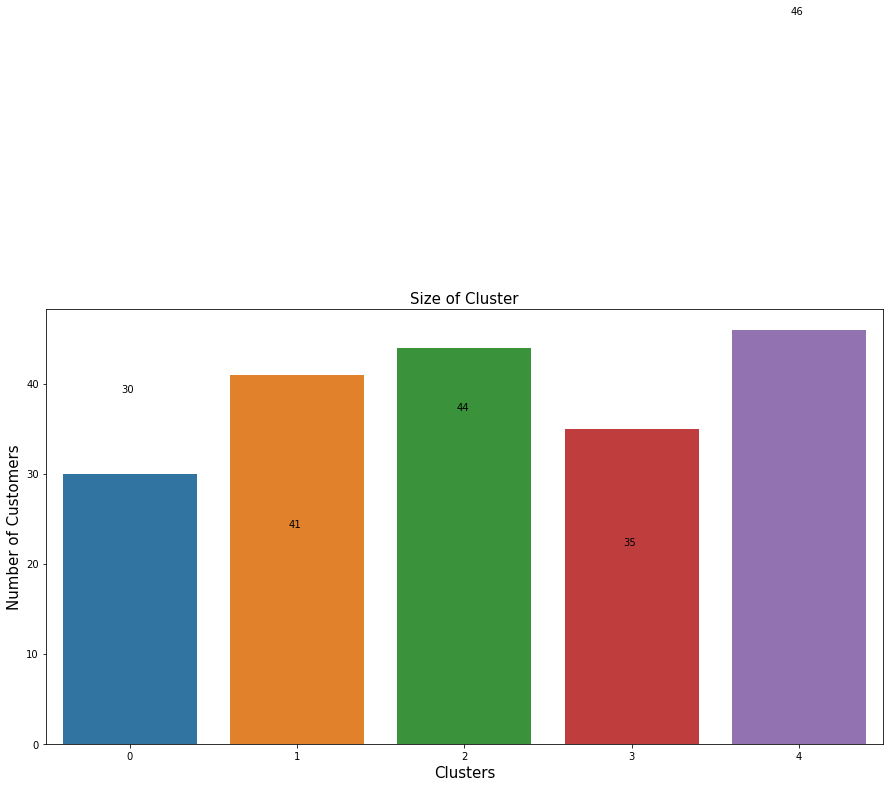

In [29]:
sns.countplot(data= df, x = 'Cluster')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =81, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])
plt.show()

The 4th cluster is the largest cluster containing more than 44 cluster as 44 is the highest in this cluster observations.